# Introduction to the Pandas module

.. codeauthor:: Emile Roux <emile.roux@univ-smb.fr>

## Scope
This notebook gives some key functions to work with data base using the panda module (https://pandas.pydata.org/)

The web gives you a lot of exemples and documentations on this module:

http://pandas.pydata.org/pandas-docs/stable/10min.html

http://www.python-simple.com/python-pandas/panda-intro.php

In [1]:
#Setup
%load_ext autoreload
%matplotlib nbagg
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

### Load data and creat a dataframe from csv file

More explaination can be found here : https://chrisalbon.com/python/data_wrangling/pandas_dataframe_importing_csv/

In [2]:
df = pd.read_csv('./_DATA/simple_csv.csv')
df

,name,groupe,note1,note2
0,Bob,A,13.0,14.0
1,John,B,9.0,11.5
2,Tom,A,7.0,15.0
3,Walter,A,13.0,15.0
4,Luke,B,13.0,16.0
5,Dora,A,14.5,14.0
6,Jessy,B,9.0,16.0
7,Jerry,A,8.0,14.2
8,Penny,B,17.0,16.0
9,Perceval,B,7.0,5.0


### Display the dataframe

In [3]:
df.head() # return the beginning of the dataframe

,name,groupe,note1,note2
0,Bob,A,13.0,14.0
1,John,B,9.0,11.5
2,Tom,A,7.0,15.0
3,Walter,A,13.0,15.0
4,Luke,B,13.0,16.0


In [4]:
df.tail() # return the end of the dataframe

,name,groupe,note1,note2
6,Jessy,B,9.0,16.0
7,Jerry,A,8.0,14.2
8,Penny,B,17.0,16.0
9,Perceval,B,7.0,5.0
10,Karadoc,A,9.0,11.0


### Selecting data in a dataframe

In [5]:
df.loc[2] # get data from index 2

name      Tom
groupe      A
note1       7
note2      15
Name: 2, dtype: object

In [6]:
df.name[2] # get name from index 2

'Tom'

In [7]:
df.name[2:6] # Sliccing is also working

2       Tom
3    Walter
4      Luke
5      Dora
Name: name, dtype: object

###  Get one of row of the dataframe

In [8]:
df.name

0       Bob
1      John
2       Tom
3    Walter
4      Luke
5      Dora
6     Jessy
Name: name, dtype: object

###  Get the number of student in groupe A and B

In [9]:
df.groupe.value_counts()

A    4
B    3
Name: groupe, dtype: int64

###  Get the proportion of student between groupe A and B

In [10]:
df.groupe.value_counts(normalize=True)

A    0.571429
B    0.428571
Name: groupe, dtype: float64

###  Display the proportion of student between groupe A and B



***Using the plot function of panda:***

<IPython.core.display.Javascript object>


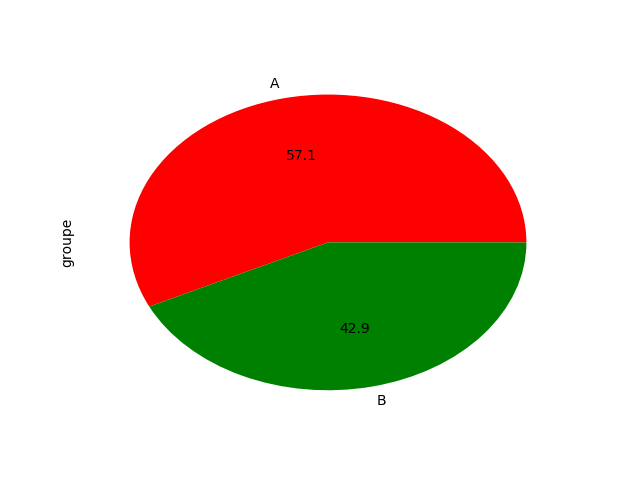

In [11]:
fig = plt.figure()
df.groupe.value_counts(normalize=True).plot.pie(labels=['A', 'B'], colors= ['r', 'g'], autopct='%.1f')
plt.show()

***Using the plot function of matplotlib:***

<IPython.core.display.Javascript object>


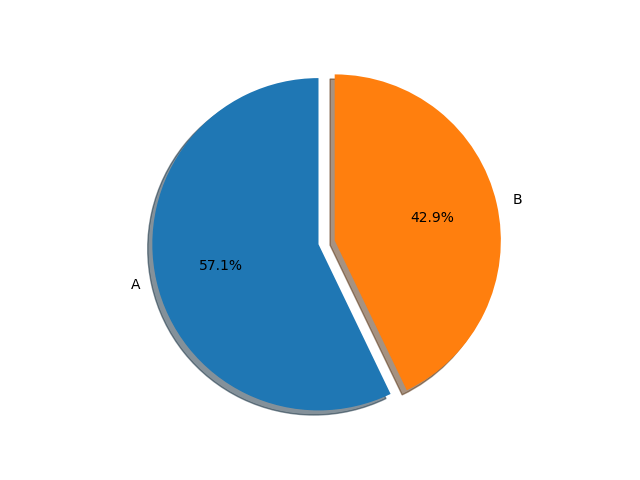

In [12]:
val = df.groupe.value_counts(normalize=True).values
explode = (0.1, 0) 
labels = "A", "B"
fig1, ax1 = plt.subplots()
ax1.pie(val, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

###  Get student list who are in groupe A

In [13]:
df[df.groupe=="A"]

,name,groupe,note1,note2
0,Bob,A,13.0,14.0
2,Tom,A,7.0,15.0
3,Walter,A,13.0,15.0
5,Dora,A,14.5,14.0


###  Make calulation on data

In [14]:
df.note1.mean() # the mean of note1 over all student

11.214285714285714

In [15]:
df.note1[df.groupe=="A"].mean() # the mean of note1 over student from A groupe

11.875

In [16]:
 df.groupby(['groupe']).mean() # compte the mean of each note for each groupe

,note1,note2
groupe,,
A,11.875000,14.5
B,10.333333,14.5


###  Add a row to a data frame

In [17]:
df=df.assign(mean=(df.note1+df.note2)/2) # Compute the mean grade for each student and add it in the dataframe

In [18]:
df

,name,groupe,note1,note2,mean
0,Bob,A,13.0,14.0,13.50
1,John,B,9.0,11.5,10.25
2,Tom,A,7.0,15.0,11.00
3,Walter,A,13.0,15.0,14.00
4,Luke,B,13.0,16.0,14.50
5,Dora,A,14.5,14.0,14.25
6,Jessy,B,9.0,16.0,12.50
